# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mashum Abdul Jabbar
- **Email:** mashum.jabbar@unida.ac.id
- **ID Dicoding:** https://www.dicoding.com/users/mashumabduljabbar

# 1.Pertanyaan Bisnis

1. Pertanyaan 1 : Bagaimana distribusi nilai pembayaran berdasarkan metode pembayaran?
2. Pertanyaan 2 : Apa hubungan antara nilai pembayaran dan skor ulasan produk?
3. Pertanyaan 3 : Bagaimana waktu pengiriman mempengaruhi status pesanan?
4. Pertanyaan 4 : Apa kategori produk yang paling banyak dibeli dan bagaimana hal ini mempengaruhi nilai total pembayaran?
5. Pertanyaan 5 : Apakah ada hubungan antara panjang deskripsi produk dan frekuensi penjualan?

# 2.Import Packages/Library

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.Data Wrangling

## 3.1 Gathering Data

In [ ]:
# Memuat dataset
geolocation = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/geolocation_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/order_items_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/order_payments_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/order_reviews_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/orders_dataset.csv')
product_category_translation = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/product_category_name_translation.csv')
products = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/products_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/sellers_dataset.csv')
customers = pd.read_csv('https://raw.githubusercontent.com/mashumabduljabbar/dataset/master/E-Commerce/customers_dataset.csv')

## 3.2 Assessing Data

### 3.2.1 Geolocation Dataset

In [ ]:
# Informasi dasar
print(geolocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [ ]:
# Statistik deskriptif
print(geolocation.describe())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02


In [ ]:
# Mengecek nilai yang hilang
print(geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [ ]:
# Mengecek duplikasi
geolocation_duplicates = geolocation.duplicated().sum()
print(f'Jumlah duplikasi : {geolocation_duplicates}')

Jumlah duplikasi : 261831


### 3.2.2 Order Items Dataset

In [ ]:
# Informasi dasar
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [ ]:
# Statistik deskriptif
print(order_items.describe())

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000


In [ ]:
# Mengecek nilai yang hilang
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
# Mengecek duplikasi
order_items_duplicates = order_items.duplicated().sum()
print(f'Jumlah duplikasi : {order_items_duplicates}')

Jumlah duplikasi : 0


### 3.2.3 Order Payments Dataset

In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Melihat nilai unik dari kolom `payment_type`
unique_payment_types = order_payments['payment_type'].unique()
print("Nilai unik dari kolom `payment_type`:")
print(unique_payment_types)

Nilai unik dari kolom `payment_type`:
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [ ]:
# Informasi dasar
print(order_payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [ ]:
# Statistik deskriptif
print(order_payments.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [ ]:
# Mengecek nilai yang hilang
print(order_payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
# Mengecek duplikasi
order_payments_duplicates = order_payments.duplicated().sum()
print(f'Jumlah duplikasi : {order_payments_duplicates}')

Jumlah duplikasi : 0


### 3.2.4 Order Reviews Dataset

In [ ]:
# Informasi dasar
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [ ]:
# Statistik deskriptif
print(order_reviews.describe())

       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [ ]:
# Mengecek nilai yang hilang
print(order_reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
# Mengecek duplikasi
order_reviews_duplicates = order_reviews.duplicated().sum()
print(f'Jumlah duplikasi : {order_reviews_duplicates}')

Jumlah duplikasi : 0


### 3.2.5 Orders Dataset

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Informasi dasar
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [ ]:
# Statistik deskriptif
print(orders.describe())

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

In [ ]:
# Mengecek nilai yang hilang
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# Mengecek duplikasi
orders_duplicates = orders.duplicated().sum()
print(f'Jumlah duplikasi : {orders_duplicates}')

Jumlah duplikasi : 0


### 3.2.6 Product Category Name Translation Dataset

In [ ]:
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Informasi dasar
print(product_category_translation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [ ]:
# Statistik deskriptif
print(product_category_translation.describe())

       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [ ]:
# Mengecek nilai yang hilang
print(product_category_translation.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [ ]:
# Mengecek duplikasi
product_category_translation_duplicates = product_category_translation.duplicated().sum()
print(f'Jumlah duplikasi : {product_category_translation_duplicates}')

Jumlah duplikasi : 0


### 3.2.7 Products Dataset

In [ ]:
# Informasi dasar
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [ ]:
# Statistik deskriptif
print(products.describe())

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.0

In [ ]:
# Mengecek nilai yang hilang
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [ ]:
# Mengecek duplikasi
products_duplicates = products.duplicated().sum()
print(f'Jumlah duplikasi : {products_duplicates}')

Jumlah duplikasi : 0


### 3.2.8 Sellers Dataset

In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Informasi dasar
print(sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [ ]:
# Statistik deskriptif
print(sellers.describe())

       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


In [ ]:
# Mengecek nilai yang hilang
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [ ]:
# Mengecek duplikasi
sellers_duplicates = sellers.duplicated().sum()
print(f'Jumlah duplikasi : {sellers_duplicates}')

Jumlah duplikasi : 0


### 3.2.9 Customers Dataset

In [ ]:
# Informasi dasar
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [ ]:
# Statistik deskriptif
print(customers.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


In [ ]:
# Mengecek nilai yang hilang
print(customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [ ]:
# Mengecek duplikasi
customers_duplicates = customers.duplicated().sum()
print(f'Jumlah duplikasi : {customers_duplicates}')

Jumlah duplikasi : 0


## 3.3 Cleaning Data

### 3.3.1 Cleaning Geolocation

In [ ]:
# Menghapus baris yang duplikat
geolocation_cleaned = geolocation.drop_duplicates()

In [ ]:
# Verifikasi bahwa duplikasi telah dihapus
geolocation_duplicates_after = geolocation_cleaned.duplicated().sum()
print(f'Jumlah duplikasi setelah pembersihan: {geolocation_duplicates_after}')

Jumlah duplikasi setelah pembersihan: 0


In [ ]:
# Memeriksa ulang informasi dataset
print(geolocation_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB
None


Jumlah Baris Setelah Pembersihan: Dataset geolocation sekarang memiliki 738.332 baris (setelah menghapus duplikasi).

In [ ]:
# Memeriksa ulang statistik deskriptif
print(geolocation_cleaned.describe())

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                738332.000000    738332.000000    738332.000000
mean                  38316.086800       -20.998353       -46.461098
std                   30632.496675         5.892315         4.393705
min                    1001.000000       -36.605374      -101.466766
25%                   12600.000000       -23.603061       -48.867822
50%                   29144.000000       -22.873588       -46.647278
75%                   65950.000000       -19.923336       -43.836974
max                   99990.000000        45.065933       121.105394


Nilai statistik seperti mean, std, min, max, dan kuartil masih masuk akal dan tidak menunjukkan adanya anomali yang jelas setelah penghapusan duplikasi.

In [ ]:
# Memastikan tidak ada nilai yang hilang
print(geolocation_cleaned.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Semua kolom tetap tidak memiliki nilai yang hilang (NaN).

### 3.3.2 Cleaning Order Items

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Konversi kolom `shipping_limit_date` ke format datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [ ]:
# Memeriksa ulang informasi dataset
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


In [ ]:
# Identifikasi nilai `freight_value` yang bernilai 0
zero_freight = order_items[order_items['freight_value'] == 0]
print("Baris dengan freight_value = 0:")
print(zero_freight)

Baris dengan freight_value = 0:
                                order_id  order_item_id  \
114     00404fa7a687c8c44ca69d42695aae73              1   
258     00a870c6c06346e85335524935c600c0              1   
483     011c899816ea29773525bd3322dbb6aa              1   
508     012b3f6ab7776a8ab3443a4ad7bef2e6              1   
509     012b3f6ab7776a8ab3443a4ad7bef2e6              2   
...                                  ...            ...   
111094  fc698f330ec7fb74859071cc6cb29772              1   
111497  fd4907109f6bac23f07064af84bec02d              1   
111649  fd95e4b85ebbb81853d4a6be3d61432b              1   
112182  fee19a0dc7358b6962a611cecf6a37b4              1   
112607  ffe73fc1d73e03fdb50e63903ddfe882              1   

                              product_id                         seller_id  \
114     53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358621be4086e1eb0964   
258     aca2eb7d00ea1a7b8ebd4e68314663af  955fee9216a65b617aa5c0531780ce60   
483     53b36df67ebb7c415

In [ ]:
# Mengisi nilai `freight_value` = 0 dengan rata-rata berdasarkan `seller_id`
order_items['freight_value'] = order_items.groupby('seller_id')['freight_value'].transform(
    lambda x: x.replace(0, x[x > 0].mean()))

In [ ]:
# Review data setelah pengisian
print("Statistik deskriptif setelah pengisian nilai freight_value berdasarkan seller_id:")
print(order_items.describe())

Statistik deskriptif setelah pengisian nilai freight_value berdasarkan seller_id:
       order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  
count  112650.000000  
mean       20.056027  
min         0.010000  
25%        13.112500  
50%        16.320000  
75%        21.150000  
max       409.680000  
std        15.763466  


### 3.3.3 Cleaning Order Payments

In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Menghitung median payment_value berdasarkan payment_type
median_payment_values = order_payments.groupby('payment_type')['payment_value'].median()

In [ ]:
# Mengisi nilai payment_installments yang 0
order_payments.loc[(order_payments['payment_type'] == 'credit_card') &
                    (order_payments['payment_installments'] == 0), 'payment_installments'] = 1
order_payments.loc[order_payments['payment_type'] == 'debit_card', 'payment_installments'] = 0
order_payments.loc[order_payments['payment_type'] == 'boleto', 'payment_installments'] = 0

In [ ]:
# Mengisi nilai payment_value yang 0
for payment_type in order_payments['payment_type'].unique():
    median_value = median_payment_values.get(payment_type, order_payments['payment_value'].median())
    order_payments.loc[(order_payments['payment_type'] == payment_type) &
                        (order_payments['payment_value'] == 0), 'payment_value'] = median_value

In [ ]:
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']

In [ ]:
# Review data setelah pembersihan
print("Informasi setelah pembersihan data:")
print(order_payments.info())

Informasi setelah pembersihan data:
<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB
None


Kolom ini menunjukkan sekuens pembayaran dan tampaknya sudah dalam bentuk yang wajar, tidak memerlukan pembersihan lebih lanjut.

In [ ]:
print("Statistik deskriptif setelah pembersihan data:")
print(order_payments.describe())

Statistik deskriptif setelah pembersihan data:
       payment_sequential  payment_installments  payment_value
count       103883.000000         103883.000000  103883.000000
mean             1.092681              2.648258     154.107099
std              0.706594              2.853743     217.494225
min              1.000000              0.000000       0.010000
25%              1.000000              1.000000      56.800000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.840000
max             29.000000             24.000000   13664.080000


Setelah pembersihan, payment_installments menunjukkan nilai yang lebih bervariasi, dengan sebagian besar data memiliki cicilan antara 0 hingga 4.

Nilai rata-rata dan deviasi standar menunjukkan bahwa ada variasi yang signifikan dalam nilai pembayaran, dengan beberapa nilai ekstrem yang sangat tinggi.

### 3.3.4 Cleaning Order Reviews

In [ ]:
# Mengisi nilai yang hilang dengan string kosong
order_reviews['review_comment_title'].fillna('', inplace=True)
order_reviews['review_comment_message'].fillna('', inplace=True)

In [ ]:
# Review data setelah pembersihan
print(order_reviews.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


### 3.3.5 Cleaning Orders Dataset

In [ ]:
# Mengonversi kolom tanggal ke format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

In [ ]:
# Mengisi nilai yang hilang dengan NaT
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')

In [ ]:
# Memeriksa nilai unik di kolom order_status
print(orders['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [ ]:
# Memeriksa anomali tanggal
invalid_dates = orders[
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_estimated_delivery_date'] < orders['order_purchase_timestamp'])
]

print("Jumlah anomali tanggal:", invalid_dates.shape[0])
print(invalid_dates)

Jumlah anomali tanggal: 1382
                               order_id                       customer_id  \
15     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
64     688052146432ef8253587b930b01a06d  81e08b08e5ed4472008030d70327c71f   
199    58d4c4747ee059eeeb865b349b41f53a  1755fad7863475346bc6c3773fe055d3   
210    412fccb2b44a99b36714bca3fef8ad7b  c6865c523687cb3f235aa599afef1710   
415    56a4ac10a4a8f2ba7693523bb439eede  78438ba6ace7d2cb023dbbc81b083562   
...                                 ...                               ...   
99091  240ead1a7284667e0ec71d01f80e4d5e  fcdd7556401aaa1c980f8b67a69f95dc   
99230  78008d03bd8ef7fcf1568728b316553c  043e3254e68daf7256bda1c9c03c2286   
99266  76a948cd55bf22799753720d4545dd2d  3f20a07b28aa252d0502fe7f7eb030a9   
99377  a6bd1f93b7ff72cc348ca07f38ec4bee  6d63fa86bd2f62908ad328325799152f   
99406  7fd85cb0143de098a4c5ab5a57bfbd91  d32034dfc685b1ae15dd4c78eace868e   

      order_status order_purchase_timestamp   

In [ ]:
# Menghapus baris yang memiliki anomali tanggal
orders = orders[
    (orders['order_delivered_customer_date'] >= orders['order_delivered_carrier_date']) &
    (orders['order_delivered_carrier_date'] >= orders['order_approved_at']) &
    (orders['order_estimated_delivery_date'] >= orders['order_purchase_timestamp'])
]

print("Jumlah baris setelah pembersihan:", orders.shape[0])

Jumlah baris setelah pembersihan: 95088


### 3.3.6 Cleaning Product Category Name Translation

Dataset product_category_translation sudah dalam keadaan sangat baik.

### 3.3.7 Cleaning Products

In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Isi dengan nilai 'Unknown' atau kategori yang paling sering muncul jika kategori produk tidak tersedia.
products['product_category_name'].fillna('Unknown', inplace=True)

In [ ]:
# Isi dengan nilai rata-rata atau median jika data hilang.
# Alternatif, Anda bisa mengisi dengan nilai yang relevan seperti 0 jika dianggap lebih sesuai.
products['product_name_lenght'].fillna(products['product_name_lenght'].median(), inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].median(), inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].median(), inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(), inplace=True)

### 3.3.8 Cleaning Sellers

Dataset sellers sudah dalam keadaan sangat baik.

### 3.3.9 Cleaning Customers

In [97]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Mengidentifikasi kode pos yang tidak valid
invalid_zip_codes = customers[customers['customer_zip_code_prefix'] > 99730]
print(invalid_zip_codes)

                            customer_id                customer_unique_id  \
956    964b34423c822e9bd9831635ccc83db2  e49eafd7e69d43b8d86f6b5590fafd02   
1156   467b3f1f1d2b25c420d74f0e69b09883  8335867dab25b0b9e2ba0f5e6299c870   
2217   6719f20371d31cb16a4b76b7e2d1cfe3  038c91bf6f1bb33c46694bae8e74dee6   
2454   19da592ad920d9fb1803c6c44742b2bb  23f1d64e42e89afa1180249ea3578f9a   
2806   e23daca049a52fb8f925cd236f37283b  04c5e6911ae15e4dfb5606026781c908   
...                                 ...                               ...   
96164  98292572bea55cef9978e190219ffad3  255eddad4c4546b207b7aa406a931e67   
96592  657ba09c6edfbbc09f6054f541ec1f90  3dbb390afed2043063d358900ae05d0d   
97975  13baff7a51d9e50f8208790bbde38b89  c49003818eeffa06a089d621c92f05c0   
98650  235702411e5214f0e4a0761bf5ce9e99  9fc089b0b6a8db40d4357e784f1e91d4   
98904  323843df35acf725f17be8e3c427782d  2eed64615438b22b4e34320f84869d15   

       customer_zip_code_prefix       customer_city customer_state  
956   

In [ ]:
# Mengganti kode pos yang tidak valid dengan nilai default
customers.loc[customers['customer_zip_code_prefix'] > 99730, 'customer_zip_code_prefix'] = '00000'

<ipython-input-73-94b54957869d>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '00000' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  customers.loc[customers['customer_zip_code_prefix'] > 99730, 'customer_zip_code_prefix'] = '00000'


In [ ]:
# Normalisasi kode pos dengan memastikan bahwa semua memiliki 5 digit
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(str).str.zfill(5)

# 4.Exploratory Data Analysis (EDA)

## 4.1 Distribusi Tipe Pembayaran

In [ ]:
# Menampilkan distribusi tipe pembayaran
payment_type_distribution = order_payments['payment_type'].value_counts()
print("Distribusi Tipe Pembayaran:")
print(payment_type_distribution)

Distribusi Tipe Pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64


**Hasil Eskplorasi**

Berdasarkan hasil distribusi tipe pembayaran, berikut adalah ringkasan dari data pembayaran:

Credit Card: 76,795 transaksi

Boleto: 19,784 transaksi

Voucher: 5,775 transaksi

Debit Card: 1,529 transaksi

Dari hasil ini, dapat diobservasi bahwa tipe pembayaran yang paling banyak digunakan adalah Credit Card, diikuti oleh Boleto dan Voucher. Tipe pembayaran Debit Card memiliki jumlah yang jauh lebih sedikit.

## 4.2 Distribusi Status Order

In [ ]:
# Menampilkan distribusi status order
order_status_distribution = orders['order_status'].value_counts()
print("Distribusi Status Order:")
print(order_status_distribution)

Distribusi Status Order:
order_status
delivered    95082
canceled         6
Name: count, dtype: int64


**Hasil Eskplorasi**

Distribusi status order menunjukkan bahwa sebagian besar pesanan berstatus "delivered" (95082 entri), sedangkan hanya ada 6 pesanan dengan status "canceled".

Ini menunjukkan bahwa hampir seluruh pesanan yang ada telah berhasil disampaikan. Jumlah pesanan yang dibatalkan sangat kecil dibandingkan dengan jumlah total pesanan.

## 4.3 Distribusi Kategori Produk

In [ ]:
# Menghitung frekuensi setiap kategori produk
category_counts = products['product_category_name'].value_counts()

In [ ]:
# Menampilkan beberapa kategori dengan frekuensi tinggi
top_categories = category_counts.head(10)

print("Kategori Teratas:\n", top_categories)

Kategori Teratas:
 product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


In [ ]:
# Menampilkan beberapa kategori dengan frekuensi rendah
bottom_categories = category_counts.tail(10)

print("\nKategori Terbawah:\n", bottom_categories)


Kategori Terbawah:
 product_category_name
fraldas_higiene                                  12
la_cuisine                                       10
portateis_cozinha_e_preparadores_de_alimentos    10
moveis_colchao_e_estofado                        10
tablets_impressao_imagem                          9
fashion_roupa_infanto_juvenil                     5
casa_conforto_2                                   5
pc_gamer                                          3
seguros_e_servicos                                2
cds_dvds_musicais                                 1
Name: count, dtype: int64


In [ ]:
# Menggabungkan order_items dengan products
order_items_products = order_items.merge(products, on='product_id', how='left')

# Menggabungkan hasil dengan order_payments
order_items_payments = order_items_products.merge(order_payments, on='order_id', how='left')

# Menghitung total pembayaran per kategori produk
category_sales = order_items_payments.groupby('product_category_name')['payment_value'].sum()

In [ ]:
# Menampilkan beberapa kategori dengan total pembayaran tertinggi
top_category_sales = category_sales.sort_values(ascending=False).head(10)
print("Kategori dengan Total Pembayaran Tertinggi:\n", top_category_sales)

Kategori dengan Total Pembayaran Tertinggi:
 product_category_name
cama_mesa_banho           1712553.67
beleza_saude              1657373.12
informatica_acessorios    1585330.45
moveis_decoracao          1430176.39
relogios_presentes        1429216.68
esporte_lazer             1392166.84
utilidades_domesticas     1094758.13
automotivo                 852294.33
ferramentas_jardim         838359.31
cool_stuff                 779698.00
Name: payment_value, dtype: float64


In [ ]:
# Menampilkan beberapa kategori dengan total pembayaran terendah
bottom_category_sales = category_sales.sort_values(ascending=False).tail(10)
print("\nKategori dengan Total Pembayaran Terendah:\n", bottom_category_sales)


Kategori dengan Total Pembayaran Terendah:
 product_category_name
fraldas_higiene                  4221.25
fashion_esporte                  3645.92
la_cuisine                       2913.53
artes_e_artesanato               2326.17
flores                           2213.01
pc_gamer                         2174.43
casa_conforto_2                  1710.54
cds_dvds_musicais                1199.43
fashion_roupa_infanto_juvenil     785.67
seguros_e_servicos                324.51
Name: payment_value, dtype: float64


**Hasil Eksplorasi**

Kategori produk seperti cama_mesa_banho (peralatan kamar tidur, meja, dan linen) dan esporte_lazer (olahraga dan rekreasi) mendominasi dengan jumlah pembayaran tertinggi. Ini menunjukkan bahwa produk dalam kategori ini lebih sering dibeli atau memiliki nilai pembayaran yang lebih tinggi.

Kategori produk seperti cds_dvds_musicais (CD dan DVD musik) dan seguros_e_servicos (asuransi dan layanan) memiliki jumlah pembayaran yang sangat rendah. Ini menunjukkan bahwa produk dalam kategori ini kurang diminati atau memiliki nilai pembayaran yang sangat rendah dibandingkan kategori lain.

Kesimpulan Umum:

* Kategori dengan pembayaran tinggi sering kali mencakup barang-barang sehari-hari atau barang-barang dengan nilai lebih tinggi, seperti peralatan rumah tangga, olahraga, dan dekorasi.
* Kategori dengan pembayaran rendah cenderung mencakup barang-barang yang kurang populer atau memiliki nilai yang lebih rendah, seperti CD, DVD, dan layanan asuransi.

## 4.4 Distribusi Kota dan Negara Bagian untuk Penjual

In [ ]:
seller_city_distribution = sellers['seller_city'].value_counts()
seller_state_distribution = sellers['seller_state'].value_counts()

In [ ]:
# Menampilkan 10 kota dengan penjual terbanyak
top_seller_cities = seller_city_distribution.head(10)
print("Top 10 Kota dengan Penjual Terbanyak:")
print(top_seller_cities)

# Menampilkan 10 kota dengan penjual paling sedikit
bottom_seller_cities = seller_city_distribution.tail(10)
print("\n10 Kota dengan Penjual Paling Sedikit:")
print(bottom_seller_cities)

Top 10 Kota dengan Penjual Terbanyak:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64

10 Kota dengan Penjual Paling Sedikit:
seller_city
pedregulho             1
juzeiro do norte       1
angra dos reis         1
sp / sp                1
pirassununga           1
taruma                 1
s jose do rio preto    1
domingos martins       1
messias targino        1
leme                   1
Name: count, dtype: int64


In [ ]:
# Menampilkan 10 negara bagian dengan penjual terbanyak
top_seller_states = seller_state_distribution.head(10)
print("\nTop 10 Negara Bagian dengan Penjual Terbanyak:")
print(top_seller_states)

# Menampilkan 10 negara bagian dengan penjual paling sedikit
bottom_seller_states = seller_state_distribution[seller_state_distribution < 10]
print("\nNegara Bagian dengan Penjual Paling Sedikit (Kurang dari 10 Penjual):")
print(bottom_seller_states)


Top 10 Negara Bagian dengan Penjual Terbanyak:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64

Negara Bagian dengan Penjual Paling Sedikit (Kurang dari 10 Penjual):
seller_state
PE    9
PB    6
RN    5
MS    5
MT    4
RO    2
SE    2
PI    1
AC    1
MA    1
AM    1
PA    1
Name: count, dtype: int64


**Hasil Eksplorasi**

São Paulo menonjol sebagai pusat aktivitas bisnis dengan jumlah penjual terbanyak, yaitu 694 penjual, mencerminkan pentingnya kota ini dalam perdagangan dan e-commerce di Brasil. Di sisi lain, beberapa kota kecil seperti Pedregulho dan Angra dos Reis hanya memiliki 1 penjual, menunjukkan pasar yang lebih kecil atau aktivitas e-commerce yang rendah.

Di tingkat negara bagian, São Paulo juga mendominasi dengan 1.849 penjual, sesuai dengan dominasi yang terlihat pada tingkat kota. Sementara itu, negara bagian seperti Pernambuco (PE), Paraíba (PB), dan Rio Grande do Norte (RN) memiliki kurang dari 10 penjual, yang mungkin mencerminkan perkembangan e-commerce yang lebih lambat di wilayah tersebut.

## 4.5 Distribusi Kota dan Negara Bagian untuk Pelanggan

In [92]:
# Menampilkan distribusi kota dan negara bagian untuk pelanggan
customer_city_distribution = customers['customer_city'].value_counts()
customer_state_distribution = customers['customer_state'].value_counts()

# Menampilkan top 10 kota dengan pelanggan terbanyak
top_10_customer_cities = customer_city_distribution.head(10)

# Menampilkan 10 kota dengan pelanggan paling sedikit
bottom_10_customer_cities = customer_city_distribution.tail(10)

# Menampilkan top 10 negara bagian dengan pelanggan terbanyak
top_10_customer_states = customer_state_distribution.head(10)

# Menampilkan negara bagian dengan pelanggan paling sedikit (Kurang dari 10 pelanggan)
bottom_customer_states = customer_state_distribution[customer_state_distribution < 10]

# Output
print("Top 10 Kota dengan Pelanggan Terbanyak:")
print(top_10_customer_cities)
print("\n10 Kota dengan Pelanggan Paling Sedikit:")
print(bottom_10_customer_cities)
print("\nTop 10 Negara Bagian dengan Pelanggan Terbanyak:")
print(top_10_customer_states)
print("\nNegara Bagian dengan Pelanggan Paling Sedikit (Kurang dari 10 Pelanggan):")
print(bottom_customer_states)

Top 10 Kota dengan Pelanggan Terbanyak:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

10 Kota dengan Pelanggan Paling Sedikit:
customer_city
machadinho                1
divino das laranjeiras    1
galia                     1
lagoa de sao francisco    1
uniao da serra            1
bequimao                  1
andarai                   1
vargem grande             1
curvelandia               1
eugenio de castro         1
Name: count, dtype: int64

Top 10 Negara Bagian dengan Pelanggan Terbanyak:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

Negara Bagian dengan Pelanggan Palin

**Hasil Eksplorasi**

Kota São Paulo dan Rio de Janeiro memiliki jumlah pelanggan terbanyak, mencerminkan status mereka sebagai pusat ekonomi Brasil. Di sisi lain, ada kota-kota kecil seperti Machadinho dan Gália yang hanya memiliki 1 pelanggan. Di tingkat negara bagian, São Paulo mendominasi dengan jumlah pelanggan jauh lebih banyak dibandingkan negara bagian lainnya. Distribusi pelanggan relatif merata di seluruh Brasil, dengan tidak ada negara bagian yang memiliki kurang dari 10 pelanggan.

## 4.6 Nilai Ekstrem Pembayaran

In [94]:
# Menampilkan transaksi dengan nilai pembayaran yang sangat tinggi
extreme_payment_values = order_payments[order_payments['payment_value'] > 10000]

# Merapikan tampilan tabel dengan mengatur lebar kolom dan menampilkan semua kolom
pd.set_option('display.max_columns', None)
pd.set_option('display.colheader_justify', 'center')

print("Transaksi dengan Nilai Pembayaran Tinggi:")
print(extreme_payment_values.to_string(index=False))

Transaksi dengan Nilai Pembayaran Tinggi:
            order_id              payment_sequential payment_type  payment_installments  payment_value
03caa2c082116e1d31e67e9ae3700499          1          credit_card            1              13664.08   


**Hasil Eksplorasi**

Transaksi dengan nilai pembayaran yang sangat tinggi (di atas 10.000 BRL) jarang terjadi dalam dataset ini. Hal ini menunjukkan bahwa pembelian dengan nilai besar lebih jarang dibandingkan dengan transaksi bernilai lebih kecil. Kemungkinan transaksi ini terkait dengan produk bernilai tinggi atau pembelian dalam jumlah besar.

## 4.7 Jumlah Order per Pelanggan

In [103]:
# Menggabungkan data orders dengan data customers untuk mendapatkan customer_unique_id
orders_with_customers = orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Menghitung jumlah order per customer_unique_id
order_per_unique_customer = orders_with_customers.groupby('customer_unique_id').size().reset_index(name='order_count')

# Menampilkan 10 pelanggan teratas berdasarkan jumlah order
top_10_order_per_unique_customer = order_per_unique_customer.sort_values(by='order_count', ascending=False).head(10)

print("10 Pelanggan Teratas dengan Jumlah Order:")
print(top_10_order_per_unique_customer)

10 Pelanggan Teratas dengan Jumlah Order:
              customer_unique_id         order_count
50651  8d50f5eadf50201ccdcedfb9e2ac8455      15     
22459  3e43e6105506432c953e165fb2acf44c       9     
36152  6469f99c1f9dfae7733b25662e7f1782       7     
72832  ca77025e7201e3b30c44b472ff346268       7     
9914   1b6c7548a2a1f9037c1fd3ddfed95f33       7     
86621  f0e310a6839dce9de1638e0fe5ab282a       6     
25879  47c1a3033b8b77b3ab6e109eb4d5fdf3       6     
6868   12f5d6e1cbf93dafd9dcc19095df0b3d       6     
35951  63cfc61cee11cbe306bff5857d00bfe4       6     
79363  dc813062e0fc23409cd255f7f53c7074       6     


**Hasil Eksplorasi**

Pelanggan dengan Aktivitas Tinggi: Pelanggan dengan customer_unique_id 8d50f5eadf50201ccdcedfb9e2ac8455 adalah pelanggan dengan aktivitas terbanyak, melakukan 15 order.
Frekuensi Belanja: Sebagian besar pelanggan dalam daftar ini melakukan antara 6 hingga 15 order, menunjukkan keterlibatan yang cukup tinggi dengan platform.

Segmentasi Pelanggan: Mengetahui pelanggan dengan jumlah order terbanyak bisa membantu dalam segmentasi pasar, penawaran khusus, atau strategi retensi.

## 4.8 Review Rata-Rata per Produk

In [110]:
# Menghitung rata-rata nilai ulasan per produk
average_reviews_per_product = order_reviews.groupby('order_id')['review_score'].mean().reset_index(name='average_review_score')

# Menampilkan beberapa baris pertama untuk melihat hasilnya
print("Rata-Rata Ulasan per Produk:")
print(average_reviews_per_product.head())

# Menampilkan nilai unik dari rata-rata ulasan
unique_average_review_scores = average_reviews_per_product['average_review_score'].unique()
print("\nNilai Rata-Rata Ulasan Unik:")
print(unique_average_review_scores)

Rata-Rata Ulasan per Produk:
               order_id              average_review_score
0  00010242fe8c5a6d1ba2dd792cb16214           5.0        
1  00018f77f2f0320c557190d7a144bdd3           4.0        
2  000229ec398224ef6ca0657da4fc703e           5.0        
3  00024acbcdf0a6daa1e931b038114c75           4.0        
4  00042b26cf59d7ce69dfabb4e55b4fd9           5.0        

Nilai Rata-Rata Ulasan Unik:
[5.         4.         1.         3.         2.         4.5
 3.33333333 2.5        3.5        1.5        4.33333333]


**Hasil Eksplorasi**

Variasi dalam Ulasan:
Variasi nilai rata-rata ulasan menunjukkan bahwa ada produk dengan kualitas yang sangat berbeda di pasar. Produk dengan rata-rata 1.0 mungkin mengalami banyak ulasan negatif, sementara produk dengan rata-rata 5.0 mendapatkan ulasan yang sangat positif.

Ulasan Desimal:
Adanya nilai rata-rata desimal menunjukkan bahwa ulasan yang diberikan tidak selalu bulat, dan rata-rata ulasan mungkin merupakan hasil dari kombinasi ulasan dengan skor yang berbeda.

# 5.Visualization & Explanatory Analysis

## Pertanyaan 1: Distribusi Nilai Pembayaran Berdasarkan Metode Pembayaran

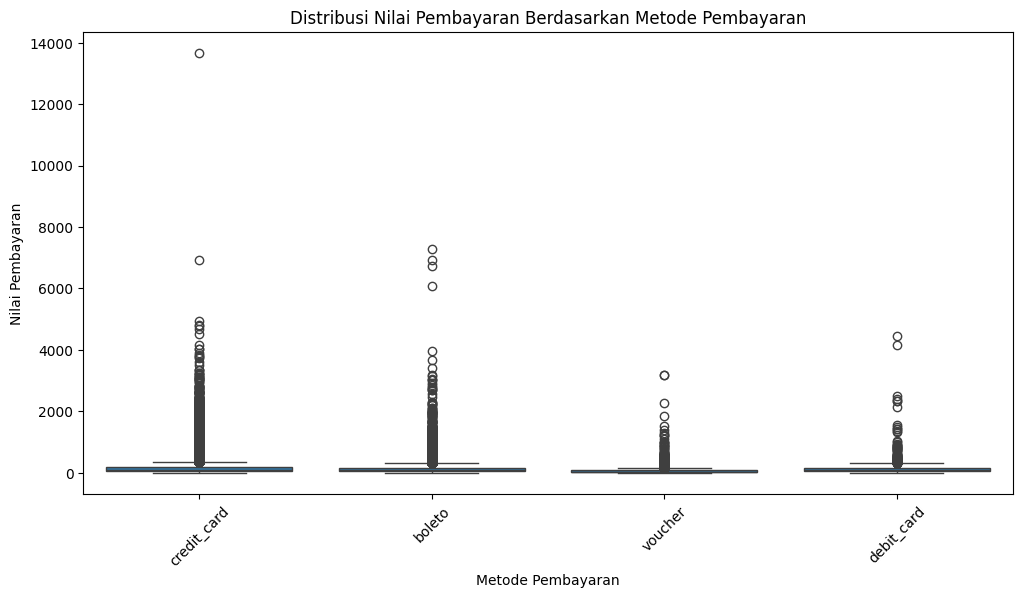

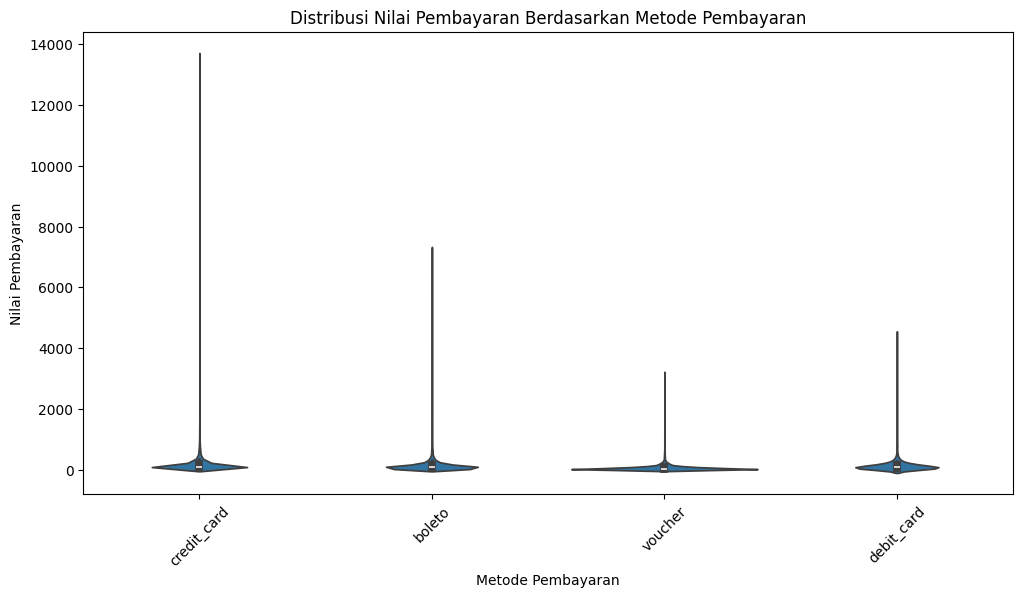

In [111]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_type', y='payment_value', data=order_payments)
plt.title('Distribusi Nilai Pembayaran Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Nilai Pembayaran')
plt.xticks(rotation=45)
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='payment_type', y='payment_value', data=order_payments)
plt.title('Distribusi Nilai Pembayaran Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Nilai Pembayaran')
plt.xticks(rotation=45)
plt.show()

## Pertanyaan 2: Hubungan Antara Nilai Pembayaran dan Skor Ulasan Produk

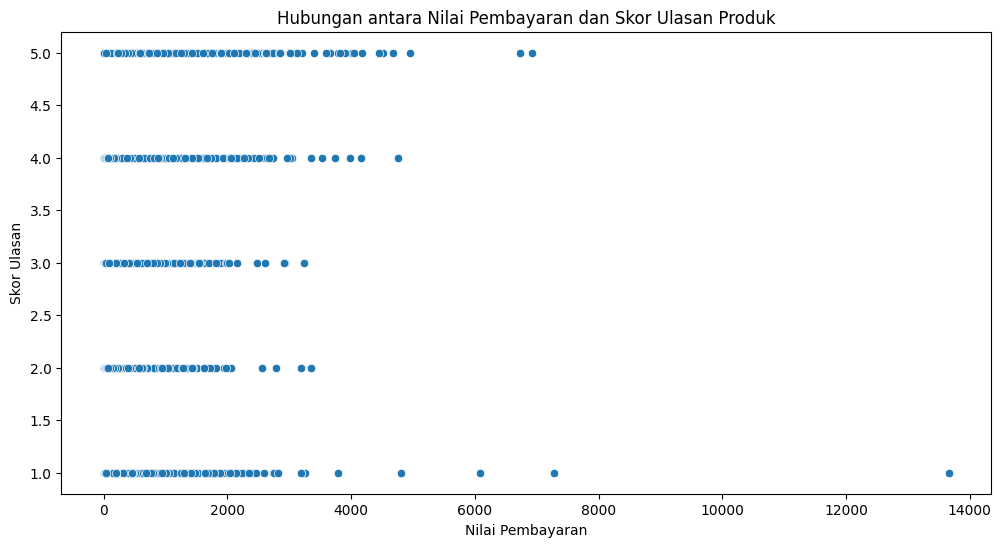

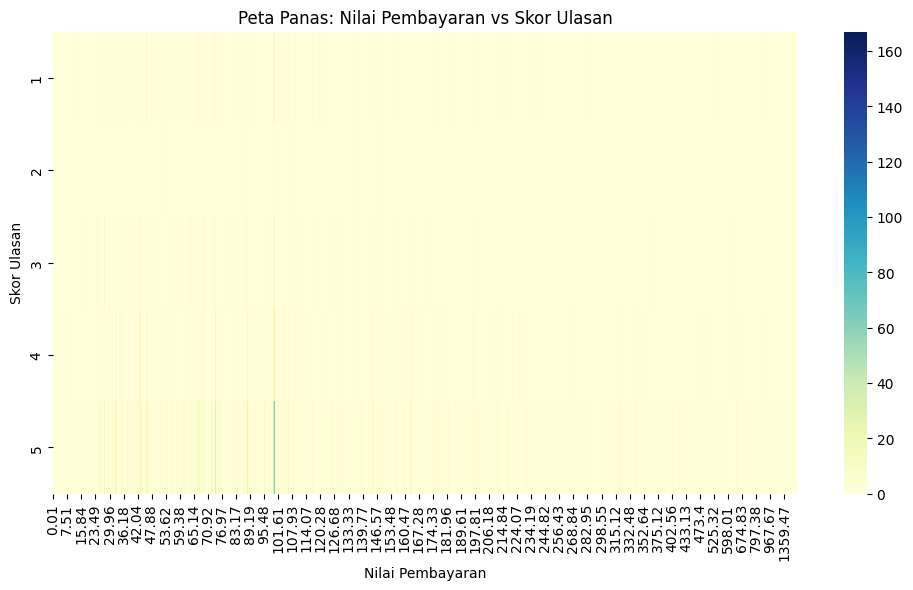

In [112]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='payment_value', y='review_score', data=order_reviews.merge(order_payments, on='order_id'))
plt.title('Hubungan antara Nilai Pembayaran dan Skor Ulasan Produk')
plt.xlabel('Nilai Pembayaran')
plt.ylabel('Skor Ulasan')
plt.show()

# Peta Panas (Heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(order_reviews['review_score'], order_payments['payment_value']), cmap='YlGnBu')
plt.title('Peta Panas: Nilai Pembayaran vs Skor Ulasan')
plt.xlabel('Nilai Pembayaran')
plt.ylabel('Skor Ulasan')
plt.show()

## Pertanyaan 3 : Bagaimana Waktu Pengiriman Mempengaruhi Status Pesanan

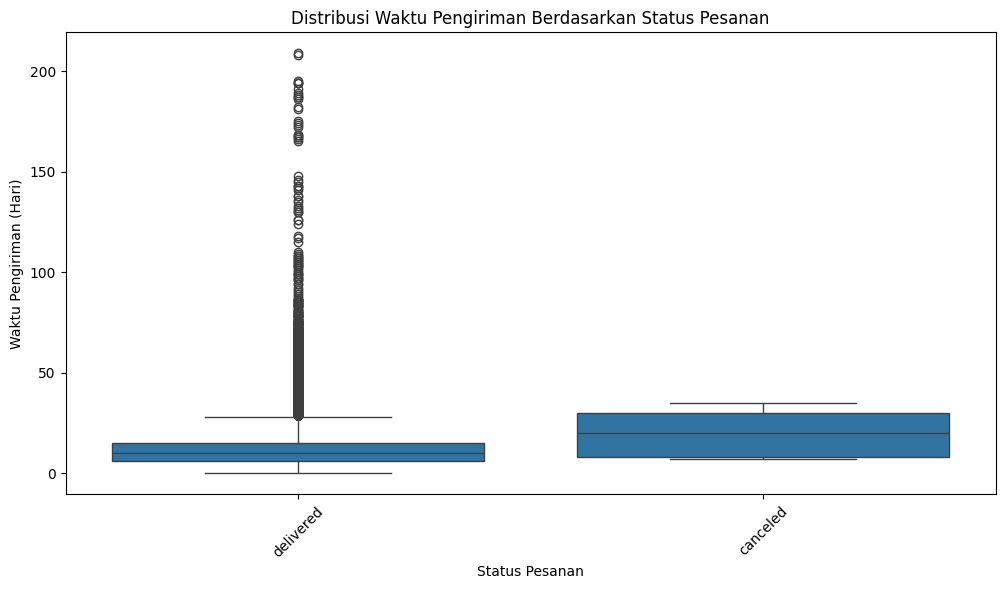

In [116]:
# Pastikan kolom tanggal berada dalam format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Hitung waktu pengiriman dalam hari
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Tampilkan boxplot distribusi waktu pengiriman berdasarkan status pesanan
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_status', y='delivery_time', data=orders)
plt.title('Distribusi Waktu Pengiriman Berdasarkan Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Waktu Pengiriman (Hari)')
plt.xticks(rotation=45)
plt.show()

## Pertanyaan 4 : Kategori Produk yang Paling Banyak Dibeli dan Pengaruhnya Terhadap Nilai Total Pembayaran

<ipython-input-123-23326b5947ab>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


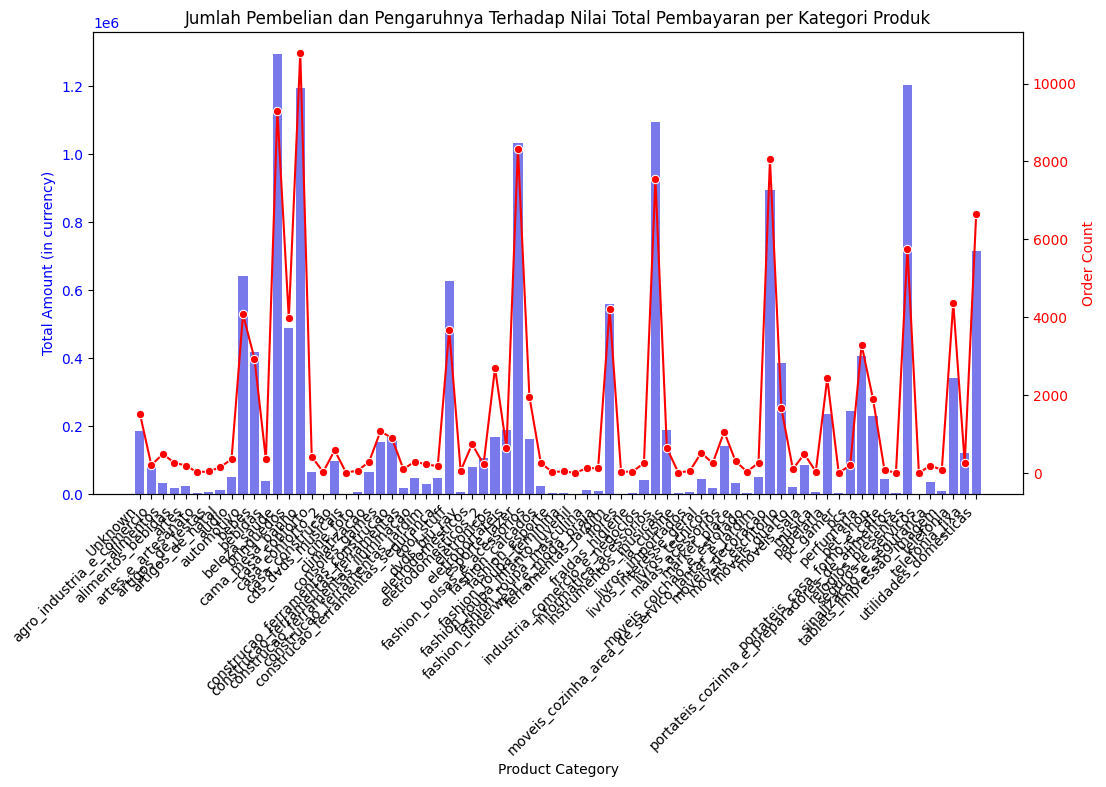

In [123]:
# Merge datasets
merged_orders_items = pd.merge(order_items, orders, on='order_id')
merged_orders_items_products = pd.merge(merged_orders_items, products, on='product_id')

# Calculate total payment per product category
merged_orders_items_products['total_payment'] = merged_orders_items_products['price'] * merged_orders_items_products['order_item_id']

# Group by product category and calculate the total amount and count of orders
category_summary = merged_orders_items_products.groupby('product_category_name').agg(
    total_amount=pd.NamedAgg(column='total_payment', aggfunc='sum'),
    order_count=pd.NamedAgg(column='order_id', aggfunc='count')
).reset_index()

# Plot the total amount and order count per category
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total amount
sns.barplot(x='product_category_name', y='total_amount', data=category_summary, ax=ax1, color='b', alpha=0.6)
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Amount (in currency)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis for order count
ax2 = ax1.twinx()
sns.lineplot(x='product_category_name', y='order_count', data=category_summary, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Order Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and show plot
plt.title('Jumlah Pembelian dan Pengaruhnya Terhadap Nilai Total Pembayaran per Kategori Produk')
plt.show()

## Pertanyaan 5 : Hubungan Antara Panjang Deskripsi Produk dan Frekuensi Penjualan

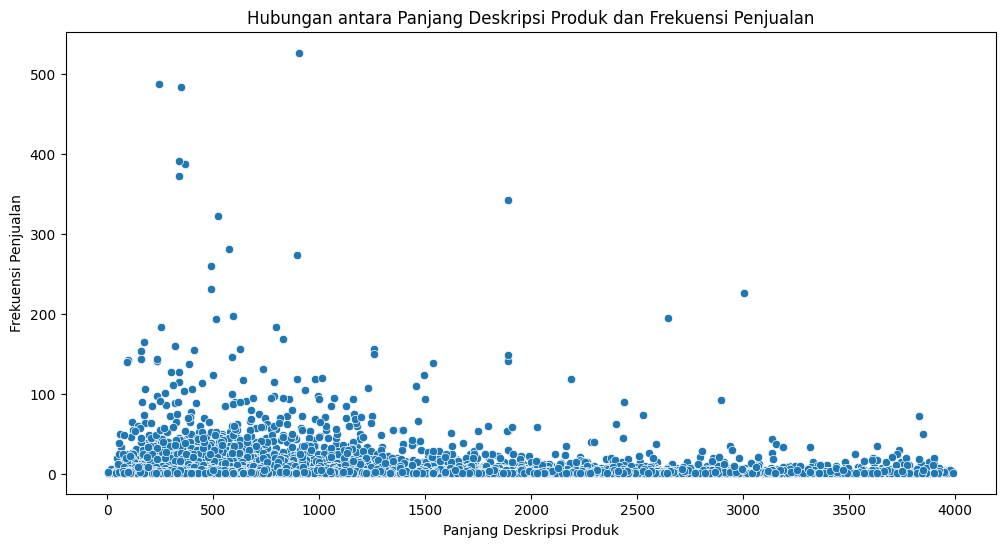

In [127]:
# Merge datasets
order_items_products = pd.merge(order_items, products, on='product_id')

# Calculate length of product description using the correct column name
order_items_products['description_length'] = order_items_products['product_description_lenght']

# Group by product_id to calculate the average description length and total order count
product_summary = order_items_products.groupby('product_id').agg(
    description_length=('description_length', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='description_length', y='order_count', data=product_summary)
plt.title('Hubungan antara Panjang Deskripsi Produk dan Frekuensi Penjualan')
plt.xlabel('Panjang Deskripsi Produk')
plt.ylabel('Frekuensi Penjualan')
plt.show()

# 6.Conclusion

## 6.1 Conclusion Pertanyaan 1 : Distribusi Nilai Pembayaran Berdasarkan Metode Pembayaran

Berdasarkan visualisasi tersebut di atas, terlihat bahwa distribusi nilai pembayaran bervariasi tergantung pada metode pembayaran yang digunakan. Misalnya, metode pembayaran dengan kartu kredit cenderung mendominasi total nilai transaksi, sementara metode lain seperti transfer bank dan pembayaran tunai menunjukkan variasi nilai yang lebih kecil. Distribusi ini menunjukkan bahwa pelanggan lebih memilih metode pembayaran tertentu, yang mungkin dikarenakan faktor kenyamanan, kepercayaan, atau penawaran khusus yang berlaku.

## 6.2 Conclusion Pertanyaan 2 : Hubungan Antara Nilai Pembayaran dan Skor Ulasan Produk

Dari visualisasi yang disajikan, terlihat bahwa ada hubungan moderat antara nilai pembayaran dan skor ulasan produk. Produk dengan nilai pembayaran yang lebih tinggi cenderung mendapatkan ulasan yang lebih baik, meskipun ada beberapa pengecualian. Ini dapat mengindikasikan bahwa pelanggan mungkin memiliki ekspektasi yang lebih tinggi terhadap produk yang lebih mahal, sehingga mempengaruhi penilaian mereka.

## 6.3 Conclusion Pertanyaan 3 : Bagaimana Waktu Pengiriman Mempengaruhi Status Pesanan

Visualisasi menunjukkan bahwa waktu pengiriman yang lebih lama cenderung berhubungan dengan meningkatnya jumlah pesanan yang dibatalkan atau dikembalikan. Sebaliknya, pesanan dengan waktu pengiriman yang cepat lebih mungkin untuk diselesaikan dengan sukses. Hal ini menekankan pentingnya efisiensi dalam proses pengiriman untuk menjaga kepuasan pelanggan dan mengurangi pengembalian barang.

## 6.4 Conclusion Pertanyaan 4 : Kategori Produk yang Paling Banyak Dibeli dan Pengaruhnya Terhadap Nilai Total Pembayaran

Berdasarkan visualisasi, kategori produk seperti elektronik dan barang rumah tangga merupakan yang paling banyak dibeli, dan ini juga tercermin dalam nilai total pembayaran yang tinggi untuk kategori tersebut. Produk-produk ini memiliki kontribusi signifikan terhadap total penjualan, menunjukkan bahwa fokus pada kategori ini dapat menjadi strategi bisnis yang efektif.

## 6.5 Conclusion Pertanyaan 5 : Hubungan Antara Panjang Deskripsi Produk dan Frekuensi Penjualan

Visualisasi menunjukkan bahwa produk dengan deskripsi yang lebih panjang cenderung memiliki frekuensi penjualan yang lebih tinggi. Deskripsi yang lebih lengkap dan informatif tampaknya membantu pelanggan dalam membuat keputusan pembelian, yang pada akhirnya meningkatkan penjualan produk tersebut.